In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import json
from scipy.stats import linregress

# Replace '../Folder1/your_file.csv' with the actual path to your CSV file
data = pd.read_csv('Data_Files/owid-covid-data.csv')

# Display the first few rows of the DataFrame
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
#data.info()

In [7]:
# Assume 'data' is your DataFrame
covid19_data = data[['location', 'date', 'total_cases',
                        'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million',
                         'icu_patients_per_million', 'hosp_patients_per_million', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                         'total_boosters_per_hundred', 'population_density', 'population'
                        ]]

covid19_data.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population_density,population
0,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
1,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
2,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
3,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
4,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0


In [8]:
#covid19_data

In [9]:
covid19_data['date'] = pd.to_datetime(covid19_data['date'])
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   location                             336078 non-null  object        
 1   date                                 336078 non-null  datetime64[ns]
 2   total_cases                          298424 non-null  float64       
 3   new_cases                            326839 non-null  float64       
 4   total_deaths                         277172 non-null  float64       
 5   new_deaths                           326894 non-null  float64       
 6   total_cases_per_million              298424 non-null  float64       
 7   new_cases_per_million                326839 non-null  float64       
 8   total_deaths_per_million             277172 non-null  float64       
 9   new_deaths_per_million               326894 non-null  float64       
 

In [10]:
# Rename the columns using the .rename() method
new_column_names = {
    'location': 'Location',
    'iso_code': 'ISO_Code',
    'date' : 'Date',
    'total_cases': 'Total_Cases',
    'new_cases': 'New_Cases',
    'total_deaths': 'Total_Deaths',
    'new_deaths': 'New_Deaths',
    'total_cases_per_million': 'Total_Cases_PerMillion',
    'new_cases_per_million': 'New_Cases_PerMillion',
    'total_deaths_per_million': 'Total_Deaths_PerMillion',
    'new_deaths_per_million': 'New_Deaths_PerMillion',
    'icu_patients_per_million': 'ICU_Patients_PerMillion',
    'hosp_patients_per_million': 'Hospital_Patients_PerMillion',
    'total_vaccinations_per_hundred': 'Total_Vaccinations_PerHundred',
    'people_vaccinated_per_hundred': 'People_Vaccinated_PerHundred',
    'people_fully_vaccinated_per_hundred': 'People_Fully_Vaccinated_PerHundred',
    'total_boosters_per_hundred': 'Total_Boosters_PerHundred',
    'population_density': 'Population_Density',
    'population': 'Population'
}
covid19_data = covid19_data.rename(columns=new_column_names)
covid19_data.head()

,Location,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred,Population_Density,Population
0,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
1,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
2,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
3,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0
4,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,54.422,41128772.0


In [15]:
## Define a function to output based on certain country.
def process_covid19_data(covid19_data, country):
    # Apply filter for rows where 'location' is in the list_of_countries
    filtered_covid19_data = covid19_data[covid19_data['Location'].isin(country)]
    
    # Drop rows with any null values
    cleaned_covid19_data = filtered_covid19_data.dropna(subset=['Total_Cases_PerMillion', 'Total_Vaccinations_PerHundred'])
    
    # Group by 'date' column and aggregate the specified columns
    grouped = cleaned_covid19_data.groupby(cleaned_covid19_data['Date'].dt.strftime('%Y-%m')).agg({
        'Total_Cases': 'sum',
        'New_Cases': 'sum',
        'Total_Deaths': 'sum',
        'New_Deaths': 'sum',
        'Total_Cases_PerMillion': 'mean',
        'New_Cases_PerMillion': 'mean',
        'Total_Deaths_PerMillion': 'mean',
        'New_Deaths_PerMillion': 'mean',
        'ICU_Patients_PerMillion': 'mean',
        'Hospital_Patients_PerMillion': 'mean',
        'Total_Vaccinations_PerHundred': 'mean',
        'People_Vaccinated_PerHundred': 'mean',
        'People_Fully_Vaccinated_PerHundred': 'mean',
        'Total_Boosters_PerHundred': 'mean',
        'Population_Density': 'sum',
        'Population': 'mean'
        
    })
    
    # Move the index to a new column ('Month-Year')
    grouped.reset_index(drop=False, inplace=True)
    
    return grouped
# Assuming you have a DataFrame named 'covid19_data'
# and a list of countries you want to filter by
country = ['Australia']  # Note the use of square brackets to define a list
# to create a filtered data for another country dataframe, just change Australia to Zimbabwe for example
# in the country = ['Zimbabwe']
# Zimbabwe_grouped_data = process_covid19_data(covid19_data, country)
# Zimbabwe_grouped_data.head()
Australia_grouped_data = process_covid19_data(covid19_data, country)
Australia_grouped_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred,Population_Density,Population
0,2021-02,231572.0,50.0,7392.0,0.0,1105.781625,0.238625,35.298000,0.000000,0.014250,0.577625,0.068750,0.068750,0.000000,NaN,25.616,26177410.0
1,2021-03,903304.0,334.0,28667.0,2.0,1113.129226,0.411645,35.326194,0.002452,0.038032,1.986387,1.008710,0.958710,0.051613,NaN,99.262,26177410.0
2,2021-04,885301.0,497.0,27812.0,2.0,1127.309233,0.632933,35.414533,0.002533,0.068567,2.499533,5.586333,4.927333,0.657667,NaN,96.060,26177410.0
3,2021-05,928970.0,305.0,28768.0,0.0,1144.757032,0.375935,35.450000,0.000000,0.062742,1.085613,12.242903,10.810000,1.406071,NaN,99.262,26177410.0
4,2021-06,915009.0,729.0,27840.0,0.0,1165.138200,0.928267,35.450000,0.000000,0.025367,1.238867,23.545000,19.851786,3.719333,NaN,96.060,26177410.0


In [16]:
# Export the DataFrame to a CSV file
Australia_grouped_data.to_csv('Australia_grouped_data.csv', index=True)

In [17]:
#Australia_grouped_data.info()

In [18]:
# Accessing the WorldBank API for GDP
url = "http://api.worldbank.org/v2/country/"
country_code = "SD"
gdp_indicator = "NY.GDP.PCAP.CD"
start_year = 2020
last_year = 2022

Aus_gdp_data = []

for year in range(start_year, last_year + 1):

    Aus_gdp_query_url = f"{url}{country_code}/indicator/{gdp_indicator}?date={year}&format=json"

    Aus_gdp_request = (requests.get(Aus_gdp_query_url)).json()
    
    Aus_gdp_data.append(Aus_gdp_request)
        
    pprint(Aus_gdp_request)

[{'lastupdated': '2023-07-25',
  'page': 1,
  'pages': 1,
  'per_page': 50,
  'sourceid': '2',
  'total': 1},
 [{'country': {'id': 'SD', 'value': 'Sudan'},
   'countryiso3code': 'SDN',
   'date': '2020',
   'decimal': 1,
   'indicator': {'id': 'NY.GDP.PCAP.CD',
                 'value': 'GDP per capita (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 608.33251953125}]]
[{'lastupdated': '2023-07-25',
  'page': 1,
  'pages': 1,
  'per_page': 50,
  'sourceid': '2',
  'total': 1},
 [{'country': {'id': 'SD', 'value': 'Sudan'},
   'countryiso3code': 'SDN',
   'date': '2021',
   'decimal': 1,
   'indicator': {'id': 'NY.GDP.PCAP.CD',
                 'value': 'GDP per capita (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 749.706787109375}]]
[{'lastupdated': '2023-07-25',
  'page': 1,
  'pages': 1,
  'per_page': 50,
  'sourceid': '2',
  'total': 1},
 [{'country': {'id': 'SD', 'value': 'Sudan'},
   'countryiso3code': 'SDN',
   'date': '2022',
   'decimal': 1,
  

In [19]:
Aus_gdp_values = []

for data in Aus_gdp_data:
    if data[1]:
        Aus_gdp_values.append({
            "Date": data[1][0]["date"],
            "GDP_per_capita": data[1][0]["value"]
        })

Aus_gdp_df = pd.DataFrame(Aus_gdp_values)
Aus_gdp_df

,Date,GDP_per_capita
0,2020,608.332520
1,2021,749.706787
2,2022,1102.146484


In [20]:
# Function to map year to GDP
def map_year_to_GDP(date_str):
    year = int(date_str.split('-')[0])
    for index, row in Aus_gdp_df.iterrows():
        if year == pd.to_numeric(row["Date"], errors='coerce'):
            return row["GDP_per_capita"]
    return None

# Apply the mapping function to create a new "Population" column
Australia_grouped_data['GDP_per_capita'] = Australia_grouped_data["Date"].apply(map_year_to_GDP)

# Display the DataFrame
Australia_grouped_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred,Population_Density,Population,GDP_per_capita
0,2021-02,231572.0,50.0,7392.0,0.0,1105.781625,0.238625,35.298000,0.000000,0.014250,0.577625,0.068750,0.068750,0.000000,NaN,25.616,26177410.0,749.706787
1,2021-03,903304.0,334.0,28667.0,2.0,1113.129226,0.411645,35.326194,0.002452,0.038032,1.986387,1.008710,0.958710,0.051613,NaN,99.262,26177410.0,749.706787
2,2021-04,885301.0,497.0,27812.0,2.0,1127.309233,0.632933,35.414533,0.002533,0.068567,2.499533,5.586333,4.927333,0.657667,NaN,96.060,26177410.0,749.706787
3,2021-05,928970.0,305.0,28768.0,0.0,1144.757032,0.375935,35.450000,0.000000,0.062742,1.085613,12.242903,10.810000,1.406071,NaN,99.262,26177410.0,749.706787
4,2021-06,915009.0,729.0,27840.0,0.0,1165.138200,0.928267,35.450000,0.000000,0.025367,1.238867,23.545000,19.851786,3.719333,NaN,96.060,26177410.0,749.706787


In [21]:
country = ['Poland']  # Note the use of square brackets to define a list

Poland_grouped_data = process_covid19_data(covid19_data, country)

url = "http://api.worldbank.org/v2/country/"
country_code = "PL"
gdp_indicator = "NY.GDP.PCAP.CD"
start_year = 2020
last_year = 2022

Pol_gdp_data = []

for year in range(start_year, last_year + 1):

    Pol_gdp_query_url = f"{url}{country_code}/indicator/{gdp_indicator}?date={year}&format=json"

    Pol_gdp_request = (requests.get(Pol_gdp_query_url)).json()
    
    Pol_gdp_data.append(Pol_gdp_request)

Pol_gdp_values = []

for data in Pol_gdp_data:
    if data[1]:
        Pol_gdp_values.append({
            "Date": data[1][0]["date"],
            "GDP_per_capita": data[1][0]["value"]
        })

Pol_gdp_df = pd.DataFrame(Pol_gdp_values)

# Function to map year to GDP
def map_year_to_GDP(date_str):
    year = int(date_str.split('-')[0])
    for index, row in Pol_gdp_df.iterrows():
        if year == pd.to_numeric(row["Date"], errors='coerce'):
            return row["GDP_per_capita"]
    return None

# Apply the mapping function to create a new "Population" column
Poland_grouped_data['GDP_per_capita'] = Poland_grouped_data["Date"].apply(map_year_to_GDP)

# Display the DataFrame
Poland_grouped_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred,Population_Density,Population,GDP_per_capita
0,2020-12,5115585.0,37477.0,111531.0,1435.0,32087.001750,235.070750,699.567000,9.001000,NaN,430.130000,0.060000,0.060000,NaN,NaN,496.108,39857144.0,15816.820402
1,2021-01,42752157.0,207139.0,995077.0,8216.0,35754.491067,173.234500,832.202967,6.871300,NaN,388.800593,1.307000,1.194333,0.224667,NaN,3720.810,39857144.0,17999.832268
2,2021-02,36655960.0,153696.0,933815.0,5340.0,39986.241652,167.659652,1018.654348,5.825130,NaN,318.487591,5.492609,3.786957,1.705217,NaN,2852.621,39857144.0,17999.832268
3,2021-03,47380382.0,476154.0,1153347.0,7201.0,49531.461208,497.771458,1205.709125,7.528042,NaN,550.257875,11.940833,7.766250,4.175833,NaN,2976.648,39857144.0,17999.832268
4,2021-04,52259576.0,318697.0,1207249.0,9864.0,65558.605950,399.799100,1514.470150,12.374100,NaN,784.041350,21.508500,15.705500,5.811000,NaN,2480.540,39857144.0,17999.832268


In [22]:
country = ['Sudan']  # Note the use of square brackets to define a list

Sudan_grouped_data = process_covid19_data(covid19_data, country)

url = "http://api.worldbank.org/v2/country/"
Sud_country_code = "SD"
gdp_indicator = "NY.GDP.PCAP.CD"
start_year = 2020
last_year = 2022

Sud_gdp_data = []

for year in range(start_year, last_year + 1):

    Sud_gdp_query_url = f"{url}{Sud_country_code}/indicator/{gdp_indicator}?date={year}&format=json"

    Sud_gdp_request = (requests.get(Sud_gdp_query_url)).json()
    
    Sud_gdp_data.append(Sud_gdp_request)

Sud_gdp_values = []

for data in Sud_gdp_data:
    if data[1]:
        Sud_gdp_values.append({
            "Date": data[1][0]["date"],
            "GDP_per_capita": data[1][0]["value"]
        })

Sud_gdp_df = pd.DataFrame(Sud_gdp_values)

# Function to map year to GDP
def map_year_to_GDP(date_str):
    year = int(date_str.split('-')[0])
    for index, row in Sud_gdp_df.iterrows():
        if year == pd.to_numeric(row["Date"], errors='coerce'):
            return row["GDP_per_capita"]
    return None

# Apply the mapping function to create a new "Population" column
Sudan_grouped_data['GDP_per_capita'] = Sudan_grouped_data["Date"].apply(map_year_to_GDP)
#change date to date time 
# Display the DataFrame
Sudan_grouped_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred,Population_Density,Population,GDP_per_capita
0,2021-03,30820.0,64.0,1929.0,5.0,657.505000,1.365000,41.153000,0.107000,NaN,NaN,0.000000,0.000000,NaN,NaN,23.258,46874200.0,749.706787
1,2021-04,131535.0,306.0,8768.0,39.0,701.532250,1.631750,46.763500,0.207750,NaN,NaN,0.185000,0.185000,NaN,NaN,93.032,46874200.0,749.706787
2,2021-05,35495.0,16.0,2630.0,2.0,757.240000,0.341000,56.108000,0.043000,NaN,NaN,0.760000,0.680000,0.080000,NaN,23.258,46874200.0,749.706787
3,2021-06,253876.0,211.0,19058.0,15.0,773.730714,0.643143,58.082429,0.045571,NaN,NaN,1.178571,0.992857,0.184286,NaN,162.806,46874200.0,749.706787
4,2021-07,37177.0,34.0,2777.0,0.0,793.123000,0.725000,59.244000,0.000000,NaN,NaN,1.730000,1.340000,0.390000,NaN,23.258,46874200.0,749.706787


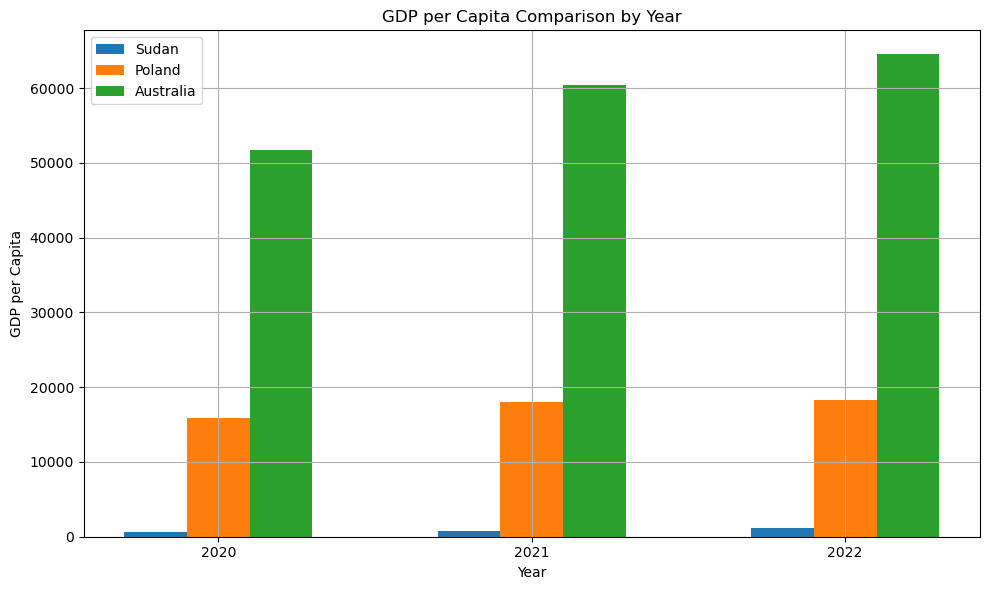

In [23]:
# Create country GDP dataframe for plotting
Country_gdp_data = pd.DataFrame({
    'Date': ['2020', '2021', '2022'],
    'GDP_per_capita_Sudan': [608.332520, 749.706787, 1102.146484], 
    'GDP_per_capita_Poland': [15816.820402, 17999.832268, 18321.280890],  # Poland GDP per capita data
    'GDP_per_capita_Australia': [51722.069000, 60444.502355, 64491.429886]  # Replace with actual Australia data
})

# Define the years and the countries for plotting
years = Country_gdp_data['Date']
countries = ['Sudan', 'Poland', 'Australia']

# Extract GDP per capita values for each country
gdp_per_capita_values = {
    country: Country_gdp_data[f'GDP_per_capita_{country}'] for country in countries
}

# Create a bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(years))

for i, country in enumerate(countries):
    plt.bar([x + i * bar_width for x in index], gdp_per_capita_values[country], bar_width, label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Comparison by Year')
plt.xticks([x + bar_width for x in index], years)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

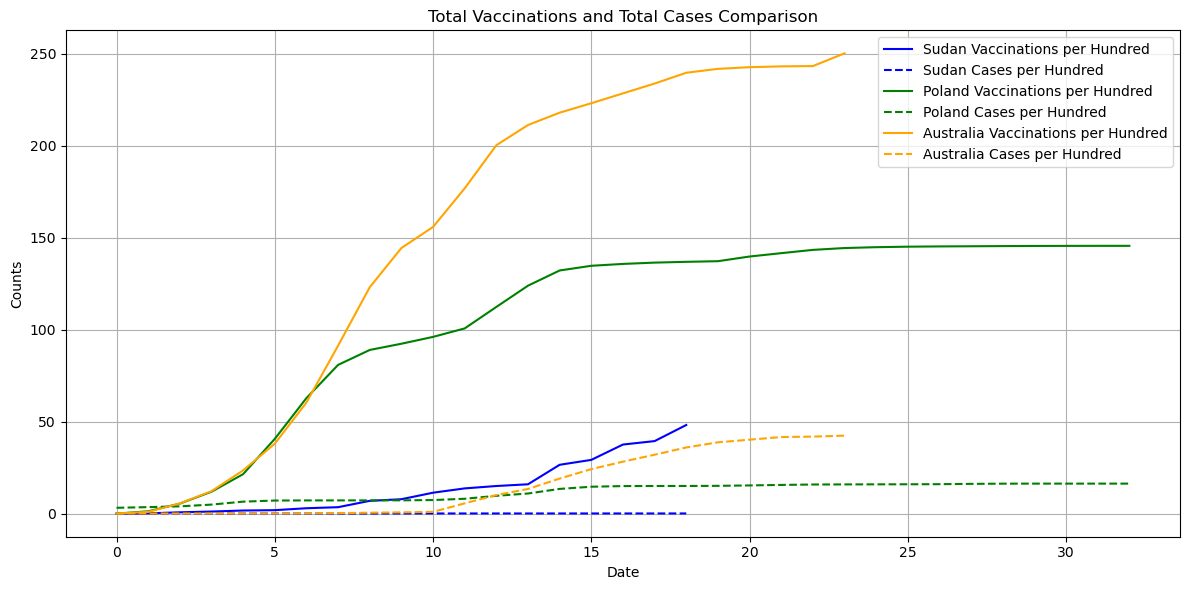

In [24]:
# Create subplots for each DataFrame
data_frames = [Sudan_grouped_data, Poland_grouped_data, Australia_grouped_data]
countries = ['Sudan', 'Poland', 'Australia']
colors = ['blue', 'green', 'orange']  # You can choose different colors

fig, ax = plt.subplots(figsize=(12, 6))

for i, (country, df) in enumerate(zip(countries, data_frames)):
    ax.plot(df.index, df['Total_Vaccinations_PerHundred'], label=f'{country} Vaccinations per Hundred', color=colors[i])
    ax.plot(df.index, df['Total_Cases_PerMillion']/10000, label=f'{country} Cases per Hundred', linestyle='--', color=colors[i])

ax.set_ylabel('Counts')
ax.set_title('Total Vaccinations and Total Cases Comparison')
ax.legend()
ax.grid(True)
#date axis ***fix
plt.xlabel('Date')
plt.tight_layout()
plt.show()